In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/titanic.csv')
data.head()
data.info()
print(data['Age'].mean())
print(data['Age'].median())
print(data['Age'].mode())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


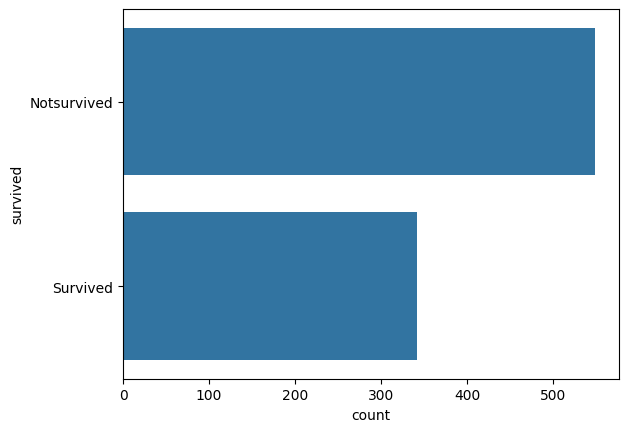

0      Notsurvived
1         Survived
2         Survived
3         Survived
4      Notsurvived
          ...     
886    Notsurvived
887       Survived
888    Notsurvived
889       Survived
890    Notsurvived
Name: survived, Length: 891, dtype: object


In [31]:
data['survived']=data['Survived'].replace({1:'Survived',0:'Notsurvived'})
sns.countplot(data['survived'])
plt.show()
print(data['survived'])


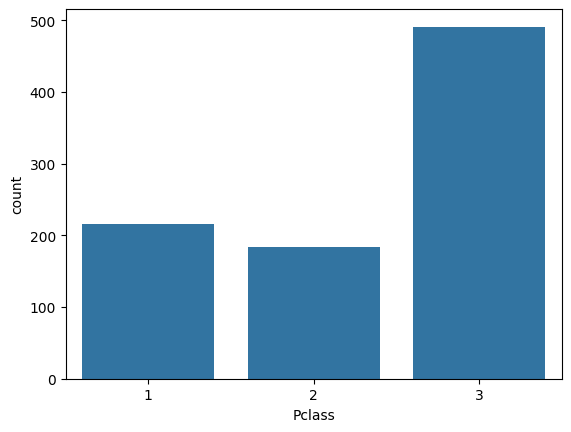

In [38]:
sns.countplot(x='Pclass',data=data)
plt.show()




In [6]:
print(data['Age'].isna().sum())

177


In [10]:
df=data['Age'].fillna(data['Age'].mean(),inplace=True)
print(df)
print(data['Age'].isna().sum())


None
0


In [17]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(data[['Fare']].select_dtypes(include=np.number)))
print(z_scores)
outliers_df = data[(z_scores > 3).all(axis=1)]
print(outliers_df)
outliers=pd.DataFrame(outliers_df)


         Fare
0    0.502445
1    0.786845
2    0.488854
3    0.420730
4    0.486337
..        ...
886  0.386671
887  0.044381
888  0.176263
889  0.044381
890  0.492378

[891 rows x 1 columns]
     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

         

<Axes: ylabel='Fare'>

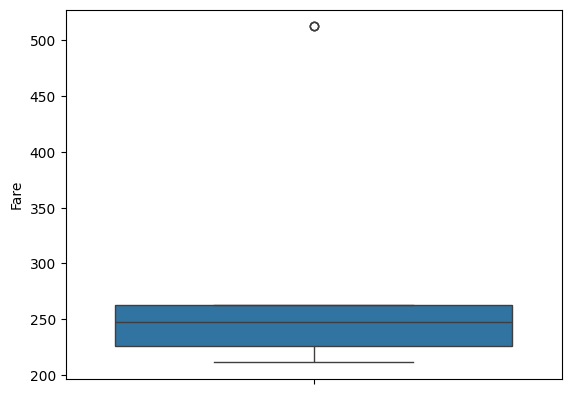

In [18]:
sns.boxplot(outliers['Fare'])